In [1]:
print("Hello world!")

Hello world!


In [32]:
import re
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
# from sklearn.compose import make_column_transformer
from sklearn.datasets import make_classification
import time
from sklearn.model_selection import GridSearchCV, train_test_split
from tabulate import tabulate
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from scipy.stats import pointbiserialr, spearmanr
import itertools
import winsound
from xgboost import XGBClassifier as XC
from sklearn.svm import SVC

In [14]:
vcqi_master = pd.read_csv(r"C:\Aniruddh\Python\Jupyter\RCC\CSV FILES\foundation\vcqi_master.csv", index_col = 0)
vcqi_master

C:\Users\aniru\AppData\Local\Temp\ipykernel_37328\1645656198.py:1: DtypeWarning: Columns (32,117,118,120,121,138,152,161,295,296,298,323,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,343,344,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,368,369,370,371,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  vcqi_master = pd.read_csv(r"C:\Aniruddh\Python\Jupyter\RCC\CSV FILES\foundation\vcqi_master.csv", index_col = 0)


,PROC NAME,CENTER CODE,REC PROGRESS,CREATED DATE,GENDER,DATE OF BIRTH,AGE AT SURGERY,MARITAL STATUS,RACE,EDUCATION,...,Unnamed: 392,Unnamed: 393,Unnamed: 394,Unnamed: 395,Unnamed: 396,Unnamed: 397,Unnamed: 398,Unnamed: 399,Unnamed: 400,Unnamed: 401
PATIENT NUMBER,,,,,,,,,,,,,,,,,,,,,
10PAT000000,Partial Nephrectomy,U5WT3NOY,Follow-up2,4/29/2015,Male,NaN,75.0,Married,White/Caucasian,Not Provided,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10PAT000001,Partial Nephrectomy,U5WT3NOY,Follow-up3,5/25/2015,Male,NaN,71.0,Married,White/Caucasian,Not Provided,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10PAT000002,Partial Nephrectomy,U5WT3NOY,Follow-up1,6/17/2015,Female,NaN,47.0,Married,Mongoloid/Asian,Not Provided,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10PAT000003,Partial Nephrectomy,U5WT3NOY,Pathology completed,6/17/2015,Male,NaN,62.0,Married,White/Caucasian,Not Provided,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10PAT000004,Partial Nephrectomy,U5WT3NOY,Follow-up1,6/22/2015,Male,NaN,43.0,Married,Mongoloid/Asian,Not Provided,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9I021,Partial Nephrectomy,3QWOG020,Follow-up completed,3/18/2016,Female,NaN,58.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9I022,Partial Nephrectomy,3QWOG020,Follow-up completed,3/18/2016,Male,NaN,64.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9I023,Partial Nephrectomy,3QWOG020,Follow-up completed,3/18/2016,Male,NaN,54.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
features = ['GENDER', 'DATE OF BIRTH', 'AGE AT SURGERY', 'CLINICAL SIZE (mm)', 'BILATERALITY OF TUMOR', 'SIDE OF TUMOR',
            'SIDE OF SURGERY', 'CT', 'CN', 'CM', 'RADIUS (maximal diameter in cm)', 'DATE OF SURGERY', 'ROBOTICS ARMS',
            'PATHOLOGICAL TUMOR SIZE', 'MIN THICKNESS MARGIN', 'MAX THICKNESS MARGIN', 'PATHOLOGY', 'HYSTOTYPE MALIGNANAT',
            'HYSTOTYPE MALIGNANAT YES', 'HYSTOTYPE BENIGN', 'HYSTOTYPE BENIGN YES', 'FUHRMAN GRADING', 'PT', 'PN',
            'DATE OF RECURRENCE', 'LAST FOLLOW UP DURATION', 'TIME TO RECURRENCE', 'LAST FOLLOW UP STATUS', 
            'LAST FOLLOW UP RECURRENCE', 'LAST TREATMENT OF RECURRENCE', 'RECURRENCE(s)']
vcqi1 = vcqi_master[features]
vcqi1

,GENDER,DATE OF BIRTH,AGE AT SURGERY,CLINICAL SIZE (mm),BILATERALITY OF TUMOR,SIDE OF TUMOR,SIDE OF SURGERY,CT,CN,CM,...,FUHRMAN GRADING,PT,PN,DATE OF RECURRENCE,LAST FOLLOW UP DURATION,TIME TO RECURRENCE,LAST FOLLOW UP STATUS,LAST FOLLOW UP RECURRENCE,LAST TREATMENT OF RECURRENCE,RECURRENCE(s)
PATIENT NUMBER,,,,,,,,,,,,,,,,,,,,,
10PAT000000,Male,NaN,75.0,45.0,No,Left,Left,T1a,N0,Not Applicable,...,NaN,Benign,Nx,NaN,9.4,NaN,Alive and disease free,NaN,NaN,"(FUP1 : None),(FUP2 : None)"
10PAT000001,Male,NaN,71.0,40.0,No,Right,Right,T1a,N0,M0,...,3.0,T1a,Nx,NaN,58.8,NaN,Alive and disease free,NaN,NaN,"(FUP1 : None),(FUP2 : None),(FUP3 : None)"
10PAT000002,Female,NaN,47.0,50.0,No,Left,Left,T1a,Nx,M0,...,1.0,T1a,Nx,NaN,4.9,NaN,Alive and disease free,NaN,NaN,(FUP1 : None)
10PAT000003,Male,NaN,62.0,50.0,No,Right,Right,T1b,N0,M0,...,2.0,T3a,Nx,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10PAT000004,Male,NaN,43.0,30.0,No,Left,Left,T1a,N0,M0,...,2.0,T1a,Nx,NaN,4.1,NaN,Alive and disease free,NaN,NaN,(FUP1 : None)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9I021,Female,NaN,58.0,35.0,NaN,NaN,Left,T1a,N0,M0,...,2.0,T1a,Nx,NaN,1.0,NaN,Alive and disease free,Absent,NaN,"(FUP1 : NULL),(FUP2 : NULL),(FUP3 : NULL),(FUP..."
9I022,Male,NaN,64.0,50.0,NaN,NaN,Left,T1b,N0,M0,...,3.0,T1b,Nx,NaN,1.0,NaN,Alive and disease free,Absent,NaN,"(FUP1 : NULL),(FUP2 : NULL),(FUP3 : NULL),(FUP..."
9I023,Male,NaN,54.0,50.0,NaN,NaN,Right,T1b,N0,M0,...,2.0,T1b,Nx,NaN,1.0,NaN,Alive and disease free,Absent,NaN,"(FUP1 : NULL),(FUP2 : NULL),(FUP3 : NULL),(FUP..."


In [16]:
vcqi1 = vcqi1.rename({'HYSTOTYPE MALIGNANAT':'HISTOTYPE MALIGNANT', 'HYSTOTYPE MALIGNANAT YES':'HISTOTYPE MALIGNANT YES',
              'HYSTOTYPE BENIGN':'HISTOTYPE BENIGN', 'HYSTOTYPE BENIGN YES':'HISTOTYPE BENIGN YES',
              'CLINICAL SIZE (mm)':'CLINICAL SIZE (MM)', 'RADIUS (maximal diameter in cm)':'RADIUS (MAXIMAL DIAMETER IN CM)', 
              'RECURRENCE(s)':'RECURRENCE(S)'}, axis = 'columns')

In [17]:
vcqi1.reset_index(drop = True, inplace = True)

In [1]:
# GENDER (GREEN)
# DATE OF BIRTH (DROP)
# AGE AT SURGERY (GREEN)
# CLINICAL SIZE (MM)
# BILATERALITY OF TUMOR (GREEN)
# SIDE OF TUMOR (GREEN)
# SIDE OF SURGERY (SHOULD IT INFORM RECURRENCE RATE?)
# CT (GREEN)
# CN (GREEN)
# CM (GREEN)
# RADIUS (MAXIMAL DIAMETER IN CM) (DROP?)
# DATE OF SURGERY (DROP?)
# ROBOTICS ARMS (DROP?)
# PATHOLOGICAL TUMOR SIZE (??)
# MIN THICKNESS MARGIN (DROP?)
# MAX THICKNESS MARGIN (DROP?)
# PATHOLOGY (ANY HELPFUL?)
# HISTOTYPE MALIGNANT (NOT LOOKING USEFUL)
# HISTOTYPE MALIGNANT YES (MATCHES THE OLD ONE, BUT THERE WAS BARELY ANY VARIATION THE LAST TIME)
# HISTOTYPE BENIGN (ALL THIS ONLY MAKES SENSE ONCE I GET THE DOC)
# HISTOTYPE BENIGN YES (SIMILAR TO HIST MAL YES)
# FUHRMAN GRADING (GREEN)
# PT (WHAT'S THIS?)
# PN (SAME LABELS AS CN)
# DATE OF RECURRENCE (TARGET?? GREEN??)
# LAST FOLLOW UP DURATION (NO IDEA, AGAIN)
# TIME TO RECURRENCE (??)
# LAST FOLLOW UP STATUS (MORTALITY, BIN)
# LAST FOLLOW UP RECURRENCE
# LAST TREATMENT OF RECURRENCE
# RECURRENCE(S)

In [21]:
vcqi1['AGE AT SURGERY'].value_counts()

AGE AT SURGERY
61.0    134
64.0    123
65.0    118
67.0    116
62.0    116
       ... 
20.0      1
19.0      1
17.0      1
21.0      1
88.0      1
Name: count, Length: 74, dtype: int64

In [23]:
# GREEN COLUMNS
# GENDER
# AGE AT SURGERY
# SIDE OF TUMOR
# CT OR PT?
# CN OR PN?
# CM
# CLINICAL SIZE OR PATHOLOGICAL TUMOR SIZE?
# BILATERALITY OF TUMOR, SIDE OF TUMOR OR SIDE OF SURGERY?
# FUHRMAN GRADING
# TIME TO RECURRENCE?

In [24]:
# GENDER (GREEN)-----------------------------------------------------------------------------------------------------------------------------------------

In [25]:
vcqi1.loc[vcqi1['GENDER'].isna(), 'GENDER']

2766    NaN
2793    NaN
2823    NaN
Name: GENDER, dtype: object

In [26]:
vcqi1['GENDER'].value_counts()

GENDER
Male      2449
Female    1339
Name: count, dtype: int64

In [27]:
# DATE OF BIRTH (DROP)-----------------------------------------------------------------------------------------------------------------------------------

In [28]:
vcqi1['DATE OF BIRTH'].isna().sum()

1362

In [29]:
vcqi1['DATE OF BIRTH'].nunique(), vcqi1['DATE OF BIRTH'].min(), vcqi1['DATE OF BIRTH'].max()

(77, 1921.0, 1998.0)

In [115]:
# AGE AT SURGERY (GREEN)---------------------------------------------------------------------------------------------------------------------------------

In [17]:
vcqi1['AGE AT SURGERY'].isna().sum()

1

In [18]:
vcqi1['AGE AT SURGERY'].value_counts()

AGE AT SURGERY
61.0    134
64.0    123
65.0    118
67.0    116
62.0    116
       ... 
20.0      1
19.0      1
17.0      1
21.0      1
88.0      1
Name: count, Length: 74, dtype: int64

In [116]:
# CLINICAL SIZE (MM)
# RADIUS (MAXIMAL DIAMETER IN CM)
# MIN THICKNESS MARGIN
# MAX THICKNESS MARGIN
# PATHOLOGICAL TUMOR SIZE--------------------------------------------------------------------------------------------------------------------------------

In [20]:
vcqi1['CLINICAL SIZE (MM)'].value_counts()

CLINICAL SIZE (MM)
30.0     202
25.0     183
20.0     182
35.0     175
40.0     173
        ... 
72.0       1
24.8       1
112.0      1
10.5       1
97.0       1
Name: count, Length: 125, dtype: int64

In [21]:
vcqi1['RADIUS (MAXIMAL DIAMETER IN CM)']

0       4 but <7
1            =<4
2       4 but <7
3       4 but <7
4            =<4
          ...   
3786         =<4
3787    4 but <7
3788    4 but <7
3789         =<4
3790         =<4
Name: RADIUS (MAXIMAL DIAMETER IN CM), Length: 3791, dtype: object

In [22]:
vcqi1['RADIUS (MAXIMAL DIAMETER IN CM)'].value_counts()

RADIUS (MAXIMAL DIAMETER IN CM)
=<4         2354
4 but <7     916
=>7          119
Name: count, dtype: int64

In [23]:
vcqi1['MIN THICKNESS MARGIN']

0       NaN
1       NaN
2       0.7
3       0.4
4       1.0
       ... 
3786    0.5
3787    0.1
3788    0.1
3789    0.1
3790    0.5
Name: MIN THICKNESS MARGIN, Length: 3791, dtype: float64

In [24]:
vcqi1['MAX THICKNESS MARGIN'].isna().sum()

3077

In [25]:
vcqi1['PATHOLOGICAL TUMOR SIZE'].value_counts()

PATHOLOGICAL TUMOR SIZE
3.5     171
3.0     159
2.5     147
2.0     133
4.0     126
       ... 
54.0      1
10.8      1
7.4       1
10.5      1
0.2       1
Name: count, Length: 157, dtype: int64

In [27]:
vcqi1['PATHOLOGICAL TUMOR SIZE'].nunique()

157

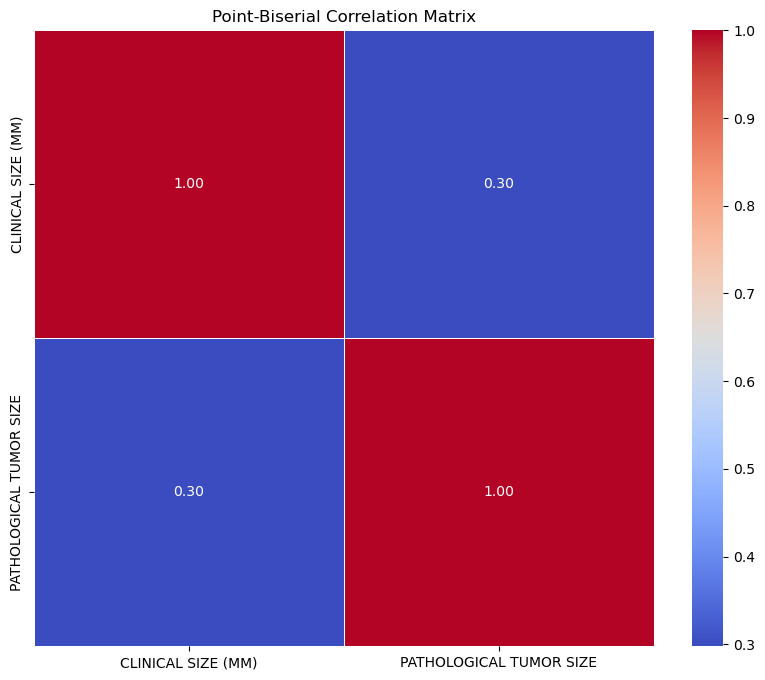

In [33]:
# Assuming df is your DataFrame and 'target' is the binary target column
temp_df = vcqi1[['CLINICAL SIZE (MM)', 'PATHOLOGICAL TUMOR SIZE']]
correlation_matrix = temp_df.corr(method='pearson')
# correlation_with_target = correlation_matrix['RECURRENCE'].sort_values(ascending=False)

# Plotting a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Point-Biserial Correlation Matrix')
plt.show()

# # Display correlation with the target
# print(correlation_with_target)

In [28]:
pat_sorted = sorted(vcqi1['PATHOLOGICAL TUMOR SIZE'].unique())
print(len(pat_sorted), len(vcqi1['PATHOLOGICAL TUMOR SIZE'].unique()))
pat_sorted

158 158


[nan,
 0.0,
 0.13,
 0.2,
 0.4,
 0.5,
 0.65,
 0.7,
 0.8,
 0.9,
 1.0,
 1.1,
 1.2,
 1.3,
 1.4,
 1.5,
 1.6,
 1.7,
 1.8,
 1.9,
 2.0,
 2.1,
 2.2,
 2.3,
 2.4,
 2.5,
 2.6,
 2.7,
 2.8,
 2.9,
 3.0,
 3.1,
 3.2,
 3.3,
 3.4,
 3.5,
 3.6,
 3.7,
 3.8,
 3.9,
 4.0,
 4.1,
 4.2,
 4.3,
 4.4,
 4.5,
 4.6,
 4.7,
 4.8,
 4.9,
 5.0,
 5.1,
 5.2,
 5.3,
 5.4,
 5.5,
 5.6,
 5.7,
 5.8,
 5.9,
 6.0,
 6.1,
 6.2,
 6.3,
 6.4,
 6.5,
 6.6,
 6.7,
 6.8,
 7.0,
 7.2,
 7.3,
 7.4,
 7.5,
 7.7,
 8.0,
 8.1,
 8.2,
 8.3,
 8.5,
 9.0,
 9.5,
 10.0,
 10.5,
 10.8,
 11.0,
 11.5,
 12.0,
 12.5,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 60.0,
 61.0,
 63.0,
 64.0,
 65.0,
 67.0,
 68.0,
 69.0,
 70.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 80.0,
 85.0,
 95.0,
 100.0,
 

In [29]:
vcqi1['CLINICAL SIZE (MM)'].nunique()

125

In [30]:
# clin_sorted = sorted(vcqi1['CLINICAL SIZE (MM)'].unique())
clin_sorted = sorted(vcqi1['CLINICAL SIZE (MM)'].unique(), key=lambda x: float('-inf') if pd.isna(x) else x)
print(len(clin_sorted), len(vcqi1['CLINICAL SIZE (MM)'].unique()))
clin_sorted

126 126


[nan,
 1.5,
 1.7,
 2.0,
 2.8,
 3.0,
 3.1,
 3.5,
 3.6,
 3.9,
 4.5,
 4.9,
 5.0,
 5.5,
 6.3,
 7.0,
 7.3,
 7.7,
 8.0,
 9.0,
 9.2,
 9.8,
 10.0,
 10.5,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 20.2,
 21.0,
 22.0,
 23.0,
 23.5,
 24.0,
 24.8,
 25.0,
 25.4,
 26.0,
 27.0,
 27.5,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 43.7,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 54.1,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 65.6,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 90.0,
 92.0,
 94.0,
 95.0,
 97.0,
 98.0,
 100.0,
 104.0,
 105.0,
 107.0,
 110.0,
 112.0,
 113.0,
 117.0,
 125.0,
 135.0,
 140.0,
 160.0,
 400.0]

In [31]:
vcqi1['CLINICAL SIZE (MM)'].value_counts()

CLINICAL SIZE (MM)
30.0     202
25.0     183
20.0     182
35.0     175
40.0     173
        ... 
72.0       1
24.8       1
112.0      1
10.5       1
97.0       1
Name: count, Length: 125, dtype: int64

In [32]:
vcqi1['PATHOLOGICAL TUMOR SIZE'].isna().sum()

472

In [117]:
# BILATERALITY OF TUMOR (GREEN) AND SIDE OF TUMOR (GREEN)------------------------------------------------------------------------------------------------

In [34]:
vcqi1['BILATERALITY OF TUMOR'].value_counts()

BILATERALITY OF TUMOR
No     2359
Yes     116
Name: count, dtype: int64

In [35]:
vcqi1['SIDE OF TUMOR'].value_counts()

SIDE OF TUMOR
Right        1357
Left         1277
Bilateral      91
Name: count, dtype: int64

In [37]:
vcqi1.loc[(vcqi1['BILATERALITY OF TUMOR'] == 'Yes') & (vcqi1['SIDE OF TUMOR'] != 'Bilateral'), ['BILATERALITY OF TUMOR', 'SIDE OF TUMOR']].value_counts()
# ?????

BILATERALITY OF TUMOR  SIDE OF TUMOR
Yes                    Right            16
                       Left             12
Name: count, dtype: int64

In [118]:
# SIDE OF SURGERY----------------------------------------------------------------------------------------------------------------------------------------

In [39]:
vcqi1['SIDE OF SURGERY'].value_counts()

SIDE OF SURGERY
Right        1929
Left         1839
Bilateral       3
Name: count, dtype: int64

In [40]:
vcqi1['SIDE OF SURGERY'].isna().sum()

20

In [119]:
# CT (GREEN)---------------------------------------------------------------------------------------------------------------------------------------------

In [43]:
vcqi1['CT'].value_counts()

CT
T1a    2281
T1b     838
T2a      99
T3a      17
T2b      12
T3b       1
Name: count, dtype: int64

In [22]:
vcqi1.isna().sum(axis = 0)

GENDER                                3
DATE OF BIRTH                      1362
AGE AT SURGERY                        1
CLINICAL SIZE (MM)                  265
BILATERALITY OF TUMOR              1316
SIDE OF TUMOR                      1066
SIDE OF SURGERY                      20
CT                                  543
CN                                  854
CM                                  902
RADIUS (MAXIMAL DIAMETER IN CM)     402
DATE OF SURGERY                       0
ROBOTICS ARMS                       470
PATHOLOGICAL TUMOR SIZE             472
MIN THICKNESS MARGIN               2115
MAX THICKNESS MARGIN               3077
PATHOLOGY                           167
HISTOTYPE MALIGNANT                  91
HISTOTYPE MALIGNANT YES             861
HISTOTYPE BENIGN                    141
HISTOTYPE BENIGN YES               3087
FUHRMAN GRADING                    1103
PT                                  544
PN                                 1123
DATE OF RECURRENCE                 3749


In [35]:
vcqi1['RECURRENCE(S)'].nunique()

54

In [30]:
drop_cols = ['DATE OF BIRTH', 'RADIUS (MAXIMAL DIAMETER IN CM)', 'RADIUS (MAXIMAL DIAMETER IN CM)', 'MIN THICKNESS MARGIN', 'MAX THICKNESS MARGIN']

In [44]:
vcqi1['CT'].isna().sum()

543

In [120]:
# CN (GREEN)---------------------------------------------------------------------------------------------------------------------------------------------

In [46]:
vcqi1['CN'].value_counts()

CN
N0    2084
Nx     838
N+      15
Name: count, dtype: int64

In [47]:
vcqi1['CN'].isna().sum()

854

In [121]:
# CM (GREEN)---------------------------------------------------------------------------------------------------------------------------------------------

In [49]:
vcqi1['CM'].value_counts()

CM
M0                2065
Not Applicable     776
M+                  48
Name: count, dtype: int64

In [50]:
vcqi1['CM'].isna().sum()

902

In [122]:
# DATE OF SURGERY----------------------------------------------------------------------------------------------------------------------------------------

In [52]:
vcqi1['DATE OF SURGERY'].value_counts()

DATE OF SURGERY
8/28/2013     7
12/4/2014     7
9/22/2011     6
5/6/2015      6
6/2/2015      6
             ..
3/7/2012      1
1/20/2012     1
12/29/2011    1
11/17/2011    1
7/13/2013     1
Name: count, Length: 2110, dtype: int64

In [53]:
vcqi1['DATE OF SURGERY'].isna().sum()

0

In [123]:
# ROBOTICS ARMS------------------------------------------------------------------------------------------------------------------------------------------

In [55]:
vcqi1['ROBOTICS ARMS'].value_counts()

ROBOTICS ARMS
3-arms    1788
4-arms    1532
1            1
Name: count, dtype: int64

In [56]:
vcqi1['ROBOTICS ARMS'].isna().sum()

470

In [124]:
# PATHOLOGY----------------------------------------------------------------------------------------------------------------------------------------------

In [58]:
vcqi1['PATHOLOGY'].value_counts()

PATHOLOGY
Malign    2919
Benign     705
Name: count, dtype: int64

In [59]:
vcqi1['PATHOLOGY'].isna().sum()

167

In [125]:
# HISTOTYPE MALIGNANT------------------------------------------------------------------------------------------------------------------------------------

In [61]:
vcqi1['HISTOTYPE MALIGNANT'].value_counts()

HISTOTYPE MALIGNANT
Yes    2930
No      770
Name: count, dtype: int64

In [63]:
vcqi1['HISTOTYPE MALIGNANT'].isna().sum()

91

In [126]:
# HISTOTYPE MALIGNANT YES--------------------------------------------------------------------------------------------------------------------------------

In [65]:
vcqi1['HISTOTYPE MALIGNANT YES'].value_counts()

HISTOTYPE MALIGNANT YES
Clear cell renal cell carcinoma                 2069
Papillary renal cell carcinoma                   531
Chromophobe renal cell carcinoma                 238
Renal cell carcinoma unclassified                 78
Metastatic tumors                                  4
Mucinous tubular and spindle cell carcinoma        3
Multilocular clear cell renal cell carcinoma       3
Xp11 translocation carcinomas                      2
Carcinoma of the collecting ducts of Bellini       2
Name: count, dtype: int64

In [66]:
vcqi1['HISTOTYPE MALIGNANT YES'].isna().sum()

861

In [127]:
# HISTOTYPE BENIGN---------------------------------------------------------------------------------------------------------------------------------------

In [68]:
vcqi1['HISTOTYPE BENIGN'].value_counts()

HISTOTYPE BENIGN
No     2946
Yes     704
Name: count, dtype: int64

In [69]:
vcqi1['HISTOTYPE BENIGN'].isna().sum()

141

In [128]:
# HISTOTYPE BENIGN YES-----------------------------------------------------------------------------------------------------------------------------------

In [71]:
vcqi1['HISTOTYPE BENIGN YES'].value_counts()

HISTOTYPE BENIGN YES
Oncocytoma                            323
Angiomyolipoma                        212
Benign Cyst                            76
Other                                  68
Xanthogranulomatous Pyelonephritis     10
Papillary Adenoma                       6
Metanephric Adenoma                     6
Mixed Epithelial and Stromal Tumor      3
Name: count, dtype: int64

In [72]:
vcqi1['HISTOTYPE BENIGN YES'].isna().sum()

3087

In [129]:
# FUHRMAN GRADING (GREEN)--------------------------------------------------------------------------------------------------------------------------------

In [75]:
vcqi1['FUHRMAN GRADING'].value_counts()

FUHRMAN GRADING
2.0    1601
3.0     663
1.0     373
4.0      51
Name: count, dtype: int64

In [76]:
vcqi1['FUHRMAN GRADING'].isna().sum()

1103

In [130]:
# PT-----------------------------------------------------------------------------------------------------------------------------------------------------

In [78]:
vcqi1['PT'].value_counts()

PT
T1a       2073
T1b        630
Benign     348
T2b         85
T3a         55
T2a         53
T2           2
T4           1
Name: count, dtype: int64

In [79]:
vcqi1['CT'].value_counts()

CT
T1a    2281
T1b     838
T2a      99
T3a      17
T2b      12
T3b       1
Name: count, dtype: int64

In [80]:
vcqi1['PT'].isna().sum()

544

In [81]:
vcqi1['CT'].isna().sum()

543

In [131]:
# PN-----------------------------------------------------------------------------------------------------------------------------------------------------

In [83]:
vcqi1['PN'].value_counts()

PN
Nx    2386
N0     276
N+       6
Name: count, dtype: int64

In [84]:
vcqi1['CN'].value_counts()

CN
N0    2084
Nx     838
N+      15
Name: count, dtype: int64

In [85]:
vcqi1['PN'].isna().sum()

1123

In [87]:
vcqi1['CN'].isna().sum()

854

In [132]:
# DATE OF RECURRENCE-------------------------------------------------------------------------------------------------------------------------------------

In [90]:
vcqi1['DATE OF RECURRENCE'].value_counts()

DATE OF RECURRENCE
12/1/2017     1
1/7/2015      1
4/22/2016     1
12/22/2015    1
12/18/2015    1
4/22/2015     1
3/25/2015     1
3/11/2015     1
2/15/2017     1
5/18/2016     1
1/28/2015     1
3/3/2020      1
4/9/2018      1
1/8/2018      1
12/3/2015     1
5/12/2016     1
11/8/2017     1
10/5/2016     1
11/10/2017    1
7/24/2017     1
9/28/2016     1
2/12/2015     1
3/24/2015     1
6/29/2015     1
9/25/2019     1
7/5/2017      1
10/20/2018    1
10/12/2018    1
1/15/2019     1
5/13/2019     1
11/17/2016    1
9/22/2018     1
4/25/2017     1
8/29/2016     1
1/12/2017     1
2/2/2017      1
1/18/2018     1
7/21/2017     1
7/2/2018      1
1/11/2017     1
1/9/2019      1
8/2/2017      1
Name: count, dtype: int64

In [91]:
vcqi1['DATE OF RECURRENCE'].isna().sum()

3749

In [92]:
vcqi1['DATE OF RECURRENCE'].notna().sum()

42

In [133]:
# LAST FOLLOW UP DURATION--------------------------------------------------------------------------------------------------------------------------------

In [94]:
vcqi1['LAST FOLLOW UP DURATION'].value_counts()

LAST FOLLOW UP DURATION
 3.0     189
 1.0     128
 0.0     117
 12.0     61
 6.0      53
        ... 
 29.7      1
 52.3      1
 36.9      1
 52.4      1
-4.2       1
Name: count, Length: 401, dtype: int64

In [95]:
vcqi1['LAST FOLLOW UP DURATION'].isna().sum()

1668

In [134]:
# TIME TO RECURRENCE-------------------------------------------------------------------------------------------------------------------------------------

In [97]:
vcqi1['TIME TO RECURRENCE'].value_counts()

TIME TO RECURRENCE
0.0           177
1.0             3
3.3             2
0.7             2
0.9             2
0.6             2
6.2             1
0.6             1
3.5             1
6.7             1
3.2             1
7.2             1
7.1             1
1.6             1
0.2             1
2.3             1
6.2             1
0.1             1
19.1            1
38.5            1
34.5            1
16.8            1
0.8             1
4.8             1
1.1             1
24.0            1
36.0            1
1.3             1
11.9            1
15.5            1
23/11/2010      1
6.8             1
2.8             1
2.5             1
1               1
0.2             1
19/1/2007       1
2/11/2009       1
21/8/2008       1
2/6/2009        1
30/3/2009       1
19/1/2010       1
9/2/2011        1
0.7             1
10/8/2011       1
22/11/2011      1
17/01/2012      1
26/12/2013      1
19/12/2012      1
14/08/2014      1
2/26/2015       1
15.2            1
3.7             1
7               1
7.3      

In [98]:
vcqi1['TIME TO RECURRENCE'].notna().sum() - max(vcqi1['TIME TO RECURRENCE'].value_counts())

61

In [135]:
# LAST FOLLOW UP STATUS----------------------------------------------------------------------------------------------------------------------------------

In [101]:
vcqi1['LAST FOLLOW UP STATUS'].value_counts()

LAST FOLLOW UP STATUS
Alive and disease free         1693
Alive with local recurrance      19
Alive with systemic disease      17
Death of other causes            17
Death of renal cancer             5
Name: count, dtype: int64

In [102]:
vcqi1['LAST FOLLOW UP STATUS'].isna().sum()

2040

In [136]:
# LAST FOLLOW UP RECURRENCE------------------------------------------------------------------------------------------------------------------------------

In [104]:
vcqi1['LAST FOLLOW UP RECURRENCE'].value_counts()

LAST FOLLOW UP RECURRENCE
Absent     1064
Distant      30
Local        17
Nodes         4
Name: count, dtype: int64

In [105]:
vcqi1['LAST FOLLOW UP RECURRENCE'].isna().sum()

2676

In [137]:
# LAST TREATMENT OF RECURRENCE---------------------------------------------------------------------------------------------------------------------------

In [107]:
vcqi1['LAST TREATMENT OF RECURRENCE'].value_counts()

LAST TREATMENT OF RECURRENCE
Medical Therapy    14
RT                  6
Surgery             5
Name: count, dtype: int64

In [108]:
vcqi1['LAST TREATMENT OF RECURRENCE'].notna().sum()

25

In [138]:
# RECURRENCE(S)------------------------------------------------------------------------------------------------------------------------------------------

In [110]:
vcqi1['RECURRENCE(S)'].value_counts()

RECURRENCE(S)
(FUP1 : NULL),(FUP2 : NULL),(FUP3 : NULL),(FUP4 : NULL),(FUP5 : NULL)                                               1115
(FUP1 : NULL),(FUP2 : NULL),(FUP3 : NULL),(FUP4 : ),(FUP5 : )                                                        556
(FUP1 : None)                                                                                                        305
(FUP1 : None),(FUP2 : NULL),(FUP3 : NULL),(FUP4 : ),(FUP5 : )                                                        289
(FUP1 : None),(FUP2 : Absent),(FUP3 : Absent),(FUP4 : 1.0),(FUP5 : 1.0)                                              156
(FUP1 : None),(FUP2 : Absent),(FUP3 : NULL),(FUP4 : ),(FUP5 : )                                                      126
(FUP1 : None),(FUP2 : None)                                                                                          110
(FUP1 : None),(FUP2 : Absent),(FUP3 : Absent),(FUP4 : ),(FUP5 : )                                                     88
(FUP1 : None),(FUP

In [111]:
vcqi1['RECURRENCE(S)'].isna().sum()

687

In [112]:
# IGNORE THE CELLS BEYOND THIS POINT---------------------------------------------------------------------------------------------------------------------

In [222]:
vcqi1['DATE OF SURGERY'].dtype

dtype('O')

In [241]:
vcqi1['DATE OF SURGERY'] = pd.to_datetime(vcqi1['DATE OF SURGERY'], format='%m/%d/%Y')
vcqi1['DATE OF RECURRENCE'] = pd.to_datetime(vcqi1['DATE OF RECURRENCE'], format='%m/%d/%Y', errors='coerce')

In [250]:
# Calculate the time difference
vcqi1['RECURRENCE TIME (CUSTOM)'] = (vcqi1['DATE OF RECURRENCE'] - vcqi1['DATE OF SURGERY']).dt.days

# Convert days to months
vcqi1['RECURRENCE TIME (CUSTOM)'] = vcqi1['RECURRENCE TIME (CUSTOM)'] / 30.4375  # Approximate number of days in a month

# Round to 2 decimal places
vcqi1['RECURRENCE TIME (CUSTOM)'] = vcqi1['RECURRENCE TIME (CUSTOM)'].round(1)

In [235]:
vcqi1.drop(vcqi1.index[vcqi1['DATE OF SURGERY'] == '0010-10-31 00:00:00.0'], inplace = True)

In [236]:
pattern = r'\d{1,2}/\d{1,2}/\d{4}'
filtered_strings = [s for s in vcqi1['DATE OF SURGERY'] if re.match(pattern, s)]
unfiltered_strings = list(set(vcqi1['DATE OF SURGERY']) - set(filtered_strings))
print(unfiltered_strings)

[]


In [238]:
non_string_indices = [i for i, val in enumerate(vcqi1['DATE OF RECURRENCE']) if not isinstance(val, str)]
non_string_values = [val for val in vcqi1['DATE OF RECURRENCE'] if not isinstance(val, str)]

print("Indices of non-string elements:", non_string_indices)
print("Non-string values:", non_string_values)

Indices of non-string elements: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 192, 193, 194, 195, 196, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [246]:
# Define the regex pattern
pattern = r'\d{1,2}/\d{1,2}/\d{4}'

# Filter out non-string and non-matching string values
non_string_indices = [i for i, val in enumerate(vcqi1['DATE OF RECURRENCE']) if not isinstance(val, str) and not pd.isnull(val)]
non_string_values = [val for val in vcqi1['DATE OF RECURRENCE'] if not isinstance(val, str) and not pd.isnull(val)]
unfiltered_strings = [s for s in vcqi1['DATE OF RECURRENCE'] if isinstance(s, str) and not re.match(pattern, s)]

print("Indices of non-string elements (excluding NaNs):", non_string_indices)
print("Non-string values (excluding NaNs):", non_string_values)
print("Strings that don't match the regex pattern:", unfiltered_strings)

Indices of non-string elements (excluding NaNs): [44, 51, 58, 148, 190, 191, 197, 506, 1007, 1017, 1101, 1554, 1557, 1568, 1569, 1575, 1580, 1603, 1720, 2101, 2103, 2109, 2149, 2560, 2565, 2568, 2971, 2973, 2974, 2987, 3006, 3025, 3031, 3034, 3040, 3052, 3084, 3101, 3114, 3153, 3154, 3155]
Non-string values (excluding NaNs): [Timestamp('2017-12-01 00:00:00'), Timestamp('2020-03-03 00:00:00'), Timestamp('2019-09-25 00:00:00'), Timestamp('2017-07-05 00:00:00'), Timestamp('2018-10-20 00:00:00'), Timestamp('2018-10-12 00:00:00'), Timestamp('2019-01-15 00:00:00'), Timestamp('2019-05-13 00:00:00'), Timestamp('2016-11-17 00:00:00'), Timestamp('2018-09-22 00:00:00'), Timestamp('2017-04-25 00:00:00'), Timestamp('2016-08-29 00:00:00'), Timestamp('2017-01-12 00:00:00'), Timestamp('2017-02-02 00:00:00'), Timestamp('2018-01-18 00:00:00'), Timestamp('2017-07-21 00:00:00'), Timestamp('2018-07-02 00:00:00'), Timestamp('2017-01-11 00:00:00'), Timestamp('2019-01-09 00:00:00'), Timestamp('2015-06-29 00:0

In [251]:
vcqi1.loc[vcqi1['DATE OF RECURRENCE'].notna(), ['DATE OF SURGERY', 'DATE OF RECURRENCE', 'TIME TO RECURRENCE', 'RECURRENCE TIME (CUSTOM)']]

,DATE OF SURGERY,DATE OF RECURRENCE,TIME TO RECURRENCE,RECURRENCE TIME (CUSTOM)
44,2017-05-29,2017-12-01,6.2,6.1
51,2018-11-23,2020-03-03,15.5,15.3
58,2019-03-04,2019-09-25,6.8,6.7
148,2017-03-27,2017-07-05,3.3,3.3
190,2018-07-27,2018-10-20,2.8,2.8
191,2018-07-30,2018-10-12,2.5,2.4
197,2018-12-15,2019-01-15,1,1.0
506,2019-05-07,2019-05-13,0.2,0.2
1007,2016-08-09,2016-11-17,3.3,3.3
1017,2017-06-22,2018-09-22,15.2,15.0


In [303]:
vcqi1.loc[vcqi1['DATE OF RECURRENCE'].notna(), 'DATE OF RECURRENCE']

44     2017-12-01
51     2020-03-03
58     2019-09-25
148    2017-07-05
190    2018-10-20
191    2018-10-12
197    2019-01-15
506    2019-05-13
1007   2016-11-17
1017   2018-09-22
1101   2017-04-25
1554   2016-08-29
1557   2017-01-12
1568   2017-02-02
1569   2018-01-18
1575   2017-07-21
1580   2018-07-02
1603   2017-01-11
1720   2019-01-09
2101   2015-06-29
2103   2015-03-24
2109   2015-02-12
2149   2016-09-28
2560   2016-04-22
2565   2015-12-22
2568   2015-12-18
2971   2015-04-22
2973   2015-03-25
2974   2015-03-11
2987   2017-02-15
3006   2016-05-18
3025   2015-01-07
3031   2015-01-28
3034   2018-04-09
3040   2018-01-08
3052   2015-12-03
3084   2016-05-12
3101   2017-11-08
3114   2016-10-05
3153   2017-11-10
3154   2017-07-24
3155   2017-08-02
Name: DATE OF RECURRENCE, dtype: datetime64[ns]

In [319]:
temp_df1 = vcqi1[vcqi1['TIME TO RECURRENCE'].notna()]
temp_df2 = temp_df1[temp_df1['TIME TO RECURRENCE'] != 0]
# temp_df2[]
temp_df2.loc[temp_df2['DATE OF RECURRENCE'].isnull(), ['DATE OF SURGERY', 'DATE OF RECURRENCE', 'TIME TO RECURRENCE']]
# vcqi1.loc[(vcqi1['DATE OF RECURRENCE'].notna() | pd.isnull(vcqi1['DATE OF RECURRENCE'])) & (vcqi1['TIME TO RECURRENCE'].notna() & vcqi1['TIME TO RECURRENCE'] != 0), ['DATE OF RECURRENCE', 'TIME TO RECURRENCE']]

,DATE OF SURGERY,DATE OF RECURRENCE,TIME TO RECURRENCE
579,2006-10-20,NaT,19/1/2007
593,2008-02-28,NaT,2/11/2009
603,2008-07-11,NaT,21/8/2008
621,2009-02-18,NaT,2/6/2009
622,2009-02-20,NaT,30/3/2009
635,2009-06-01,NaT,19/1/2010
639,2009-07-03,NaT,23/11/2010
644,2009-08-05,NaT,9/2/2011
679,2010-03-12,NaT,10/8/2011
687,2010-07-12,NaT,22/11/2011


In [297]:
~(vcqi1['TIME TO RECURRENCE'] == 0 | vcqi1['TIME TO RECURRENCE'].notna())

0       True
1       True
2       True
3       True
4       True
        ... 
3786    True
3787    True
3788    True
3789    True
3790    True
Name: TIME TO RECURRENCE, Length: 3790, dtype: bool

In [298]:
vcqi1.loc[(vcqi1['TIME TO RECURRENCE'] == 0 | vcqi1['TIME TO RECURRENCE'].notna()), 'TIME TO RECURRENCE']

3084    1.0
3155    1.0
3399    1.0
Name: TIME TO RECURRENCE, dtype: object

In [1]:
# ind = vcqi['TIME TO RECURRENCE']
vcqi1.loc[vcqi1['DATE OF RECURRENCE'].isna() & (vcqi1['TIME TO RECURRENCE'].notna() & vcqi1['TIME TO RECURRENCE'] == 0), ['DATE OF RECURRENCE', 'TIME TO RECURRENCE']]

NameError: name 'vcqi1' is not defined

In [264]:
vcqi1.loc[vcqi1['TIME TO RECURRENCE'].notna() & vcqi1['TIME TO RECURRENCE'] != 0, ['DATE OF RECURRENCE', 'TIME TO RECURRENCE']]

AttributeError: 'Series' object has no attribute 'notnat'